In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("../Data/dementia_dataset.csv")
dementia = data.copy()

In [3]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
dementia.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
dementia.fillna(dementia.mean(), inplace=True)

In [8]:
dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


In [9]:
dementia.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [10]:
# Subject Id and MRI IDare almost the same
# Let's drop the MRI ID
dementia.drop("MRI ID", axis=1, inplace=True)

In [33]:
labels = {"Nondemented": 0, "Demented": 1, "Converted": 2}
dementia["Group"] = dementia["Group"].map(labels)

In [34]:
dementia.head()

,Subject ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,1,0,M,R,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,0,2,457,M,R,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,1,1,0,M,R,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,1,2,560,M,R,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,1,3,1895,M,R,80,12,2.460452,22.0,0.5,1698,0.701,1.034


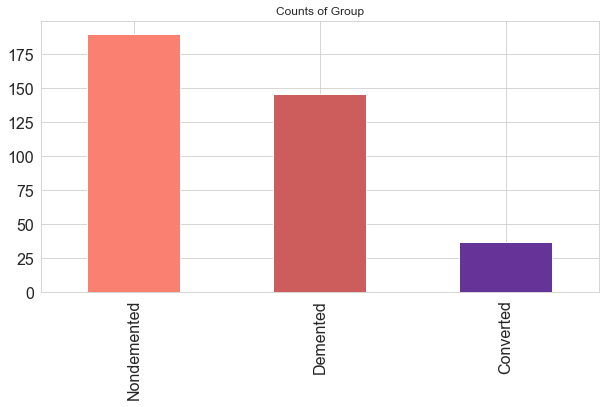

In [14]:
dementia["Group"].value_counts().plot(kind="bar", 
                                      figsize=(10, 5), 
                                      color=["salmon", "indianred", "rebeccapurple"],
                                      title="Counts of Group",
                                      fontsize=16);

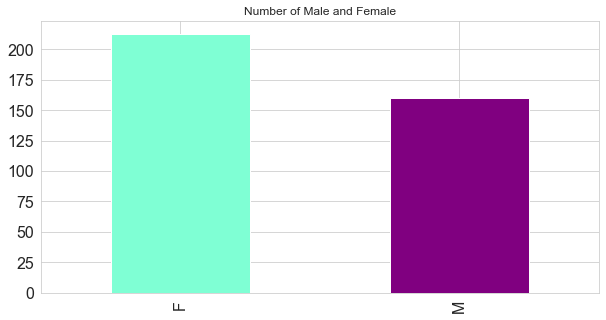

In [12]:
dementia["M/F"].value_counts().plot(kind="bar",
                                    figsize=(10, 5), 
                                    color=["aquamarine", "purple"], 
                                    title="Number of Male and Female",
                                    fontsize=16);

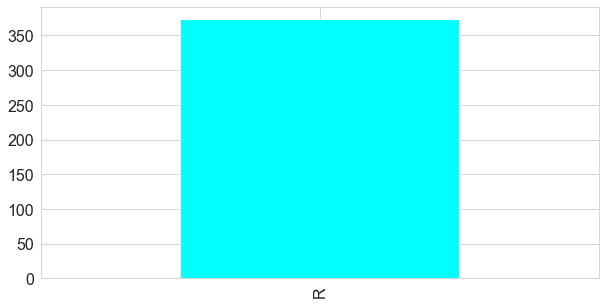

In [13]:
dementia["Hand"].value_counts().plot(kind="bar",
                                     figsize=(10, 5), 
                                     color=["cyan", "lightpink"], 
                                     fontsize=16);

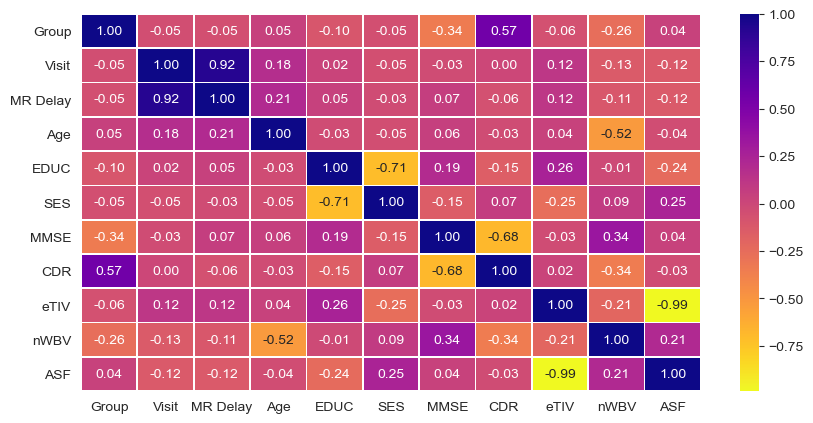

In [115]:
corr = dementia.corr()
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
sns.heatmap(corr, annot=True, fmt=".2f",cmap="plasma_r", linewidth=0.5, ax=ax);

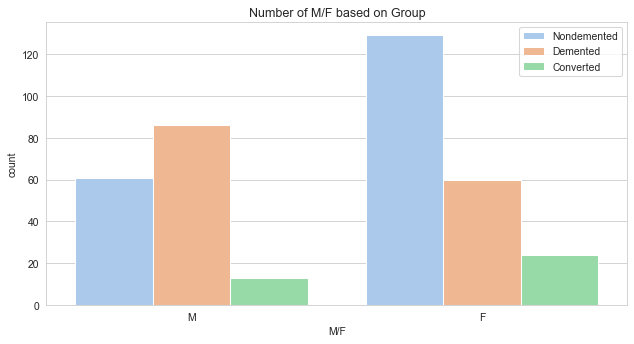

In [101]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=75)
sns.countplot(x="M/F",
             hue="Group",
             data=dementia,
             palette="pastel",
             ax=ax);
ax.set_title("Number of M/F based on Group");
ax.legend(["Nondemented", "Demented", "Converted"]);

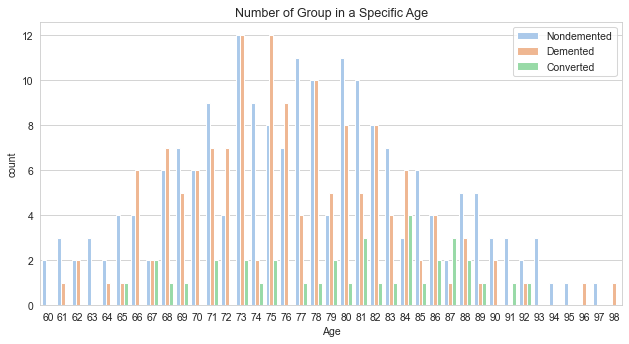

In [56]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=75)
sns.countplot(x='Age', 
              hue='Group',
              data=dementia, 
              palette="pastel",
              ax=ax)
ax.set_title("Number of Group in a Specific Age")
ax.legend(["Nondemented", "Demented", "Converted"], loc="upper right");

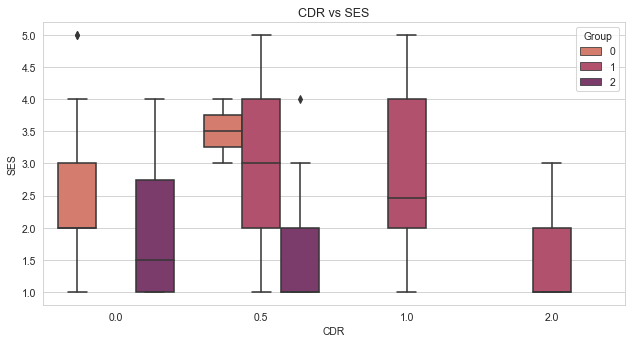

In [116]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=75)
sns.boxplot(x="CDR", 
           y="SES",
           hue="Group",
           data=dementia,
           palette="flare",
           ax=ax);
ax.set_title("CDR vs SES");

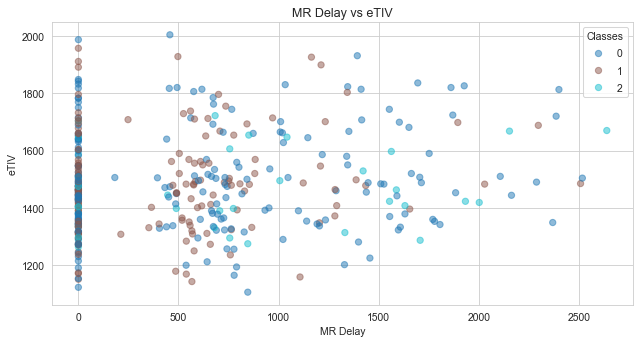

In [67]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=75)
scatter = ax.scatter(x="MR Delay",
           y="eTIV",
           c="Group",
           cmap="tab10",
           alpha=0.5,
           data=dementia)
ax.set_title("MR Delay vs eTIV")
ax.set_xlabel("MR Delay")
ax.set_ylabel("eTIV")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes");

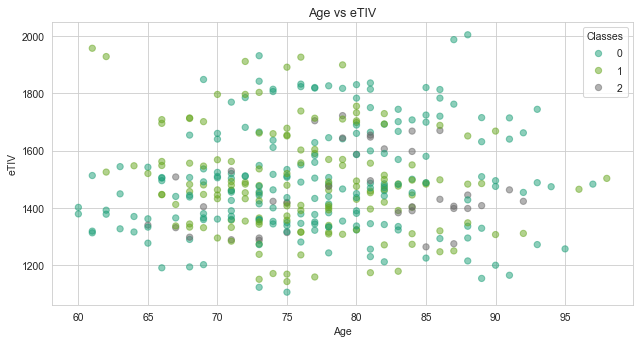

In [68]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=75)
scatter = ax.scatter(x="Age", 
           y="eTIV",
           c="Group",
           cmap="Dark2",
           alpha=0.5,
           data=dementia);
ax.set_title("Age vs eTIV")
ax.set_xlabel("Age")
ax.set_ylabel("eTIV")
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes");
